In [1]:
import numpy as np
import matplotlib.pyplot as plt

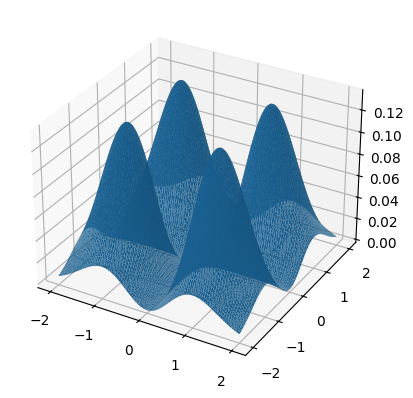

In [15]:
# don't worry about this part, we're just visualizing the function
lim = 2
x = np.linspace(-lim, lim, 100)
y = np.linspace(-lim, lim, 100)
xx, yy = np.meshgrid(x, y)
grid = np.vstack((xx.flatten(), yy.flatten())).T
xg = grid[:,0]
yg = grid[:,1]
f = xg ** 2 * yg ** 2 * np.exp(-xg**2 - yg**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xg, yg, f, linewidth=0.2, antialiased=True);

In [19]:
# objective function
def f(x_):
  x, y = x_
  return x ** 2 * y ** 2 * np.exp(-x**2 - y**2)

In [20]:
# gradient of objective function 2x1 vector [∂f/∂x,∂f/∂y]
def grad(x_):
  x, y = x_
  g = 2 * x * y * np.exp(-x**2 - y**2) * np.array([y * (1 - x**2), x * (1 - y**2)])
  return g

In [22]:
# Hessian of objective function 2x2 matrix [[∂²f/∂x²,(∂f/∂x)(∂f/∂y)],[(∂f/∂y)(∂f/∂x),∂²f/∂y²]
def H(x_):
  x, y = x_
  a = 2 * y**2 * (1 - 5 * x**2 + 2 * x**4)
  b = 4 * x * y * (1 - x**2) * (1 - y**2)
  d = 2 * x**2 * (1 - 5 * y**2 + 2 * y**4)
  return np.exp(-x**2 - y**2) * np.array([[a, b], [b, d]])

In [23]:
# gradient ascent
x_ = np.array([2, 2])
n_iters = 300
vals = np.zeros(n_iters)
for i in range(n_iters):
  x_ = x_ + 0.1 * grad(x_)
  vals[i] = f(x_)
x_

array([1.00009138, 1.00009138])

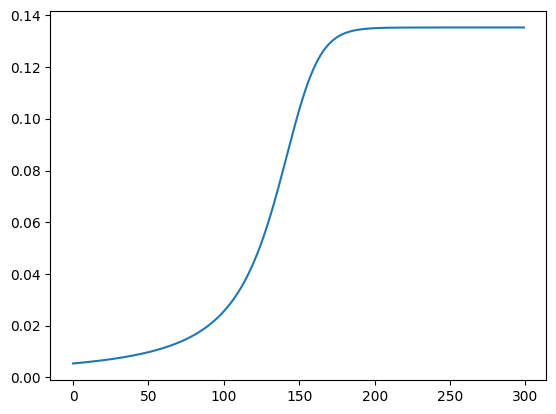

In [24]:
plt.plot(vals);

In [53]:
# newton
# x_ = np.array([2, 2])
# x_ = np.array([1.2, 1.2])
# x_ = np.array([1, 1])


# MY COMMENT: Newton's method converges faster because x ** 2 * y ** 2 * np.exp(-x**2 - y**2)
# is "Nearly Quadratic" for very small np.exp(-x**2 - y**2), hence Taylor Quadratic Approximation
# is nearly exact
x_ = np.array([1.3, 1.3])
n_iters = 50
vals = np.zeros(n_iters)
for i in range(n_iters):
  h = H(x_)
  g = grad(x_)
  # print(h.shape, g.shape)
  x_ = x_ - np.linalg.solve(h, g)
  vals[i] = f(x_)
x_

array([3.55395312e-10, 3.55395312e-10])

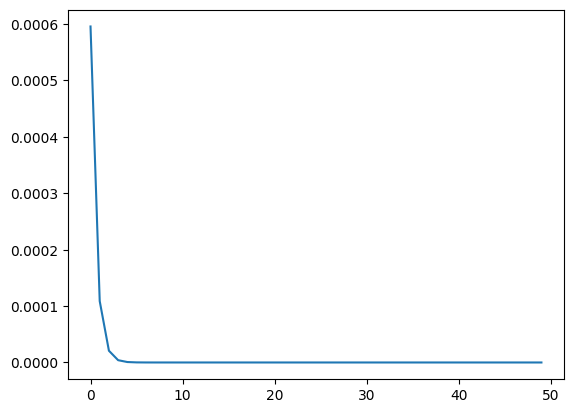

In [54]:
plt.plot(vals);

In [56]:
import torch
from torch.autograd.functional import hessian

arr = [2, 2]

def torch_f(x_):
  x, y = x_
  return x ** 2 * y ** 2 * torch.exp(-x**2 - y**2)

inputs = torch.Tensor(arr)
print(hessian(torch_f, inputs))

x_ = np.array(arr)
print(H(x_))

tensor([[0.0349, 0.0483],
        [0.0483, 0.0349]])
[[0.03488811 0.04830662]
 [0.04830662 0.03488811]]
